The diabetes.csv aims to predict a person’s progression in the condition
with respect to various attributes about them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

Read diabetes.csv into Jupyter Notebook.

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# Is there any null data
data.isnull().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

Differentiate between the independent variables and the dependent
variable, and assign them to variables X and Y.

Independent variable aka manipulated veriable. The variable you change X
Dependent variable aka responding variables. The variable you measure Y
And there more for dependent: "response variable", "regressand", "criterion", "predicted variable", "measured variable", "explained variable", "experimental variable", "responding variable", "outcome variable", "output variable", "target" or "label"

In [4]:
data['Progression'].shape

(442,)

In [5]:
data.iloc[:,10].shape

(442,)

Same data, same shape. Which one should I be using.

In [6]:
X = data.iloc[:, 0:10]
Y = data.iloc[:,10].values.reshape(-1, 1)
print(X.shape, Y.shape)

(442, 10) (442, 1)


Generate training and test sets comprising 80% and 20% of the data respectively.

In [7]:
# Train with the Answer to the Ultimate Question of Life
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Use a MinMaxScaler and StandardScaler from sklearn.preprocessing. Fit these scalers on the train set, and use these fit scalers to transform the train and test sets.

I have gone head first, not waited for anyone. It has been hard. One of the things that has come up, is I should be using fit_transform, not fit then transform. Reason given was that it was a little less process heavy. If this is wrong I would like to know.

In [8]:
# Only trained data is fitted
standard_s = StandardScaler()
X_train_scaled_standard = standard_s.fit_transform(X_train)
X_test_scaled_standard = standard_s.transform(X_test)

In [9]:
min_max_s = MinMaxScaler()
X_train_scaled_min_max = min_max_s.fit_transform(X_train)
X_test_scaled_min_max = min_max_s.transform(X_test)

Generate a multiple linear regression model using the training set. Use all
of the independent variables.

In [10]:
standard_model = LinearRegression()
standard_model.fit(X_train_scaled_standard, Y_train)
print("Intercept:", standard_model.intercept_)
print("Coefficients:", standard_model.coef_)

Intercept: [153.73654391]
Coefficients: [[  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
   24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]]


In [11]:
min_max_model = LinearRegression()
min_max_model.fit(X_train_scaled_min_max, Y_train)
print("Intercept:", min_max_model.intercept_)
print("Coefficients:", min_max_model.coef_)

Intercept: [-25.13322785]
Coefficients: [[   8.2612689   -23.06446772  135.63561351   84.9935688  -244.80178532
   162.87932677   46.32729542   72.03113268  191.18672297   13.3055384 ]]


 Print out the intercept and coefficients of the trained model.

See above. 

 Generate predictions for the test set.

In [12]:
predictions_s = standard_model.predict(X_test_scaled_standard)

In [13]:
predictions_m = min_max_model.predict(X_test_scaled_min_max)

Compute R-squared for your model on the test set. You can use r2_score from sklearn.metrics to obtain this score.

In [14]:
r_squared_s = r2_score(Y_test, predictions_s)
print("R-squared for standard_model:", r_squared_s)

R-squared for standard_model: 0.4526027629719189


In [15]:
r_squared_m = r2_score(Y_test, predictions_m)
print("R-squared for min_max_model:", r_squared_m)

R-squared for min_max_model: 0.4526027629719187


I would say looking at the R-squared value, that the model need more traing. You want a score closer to 1

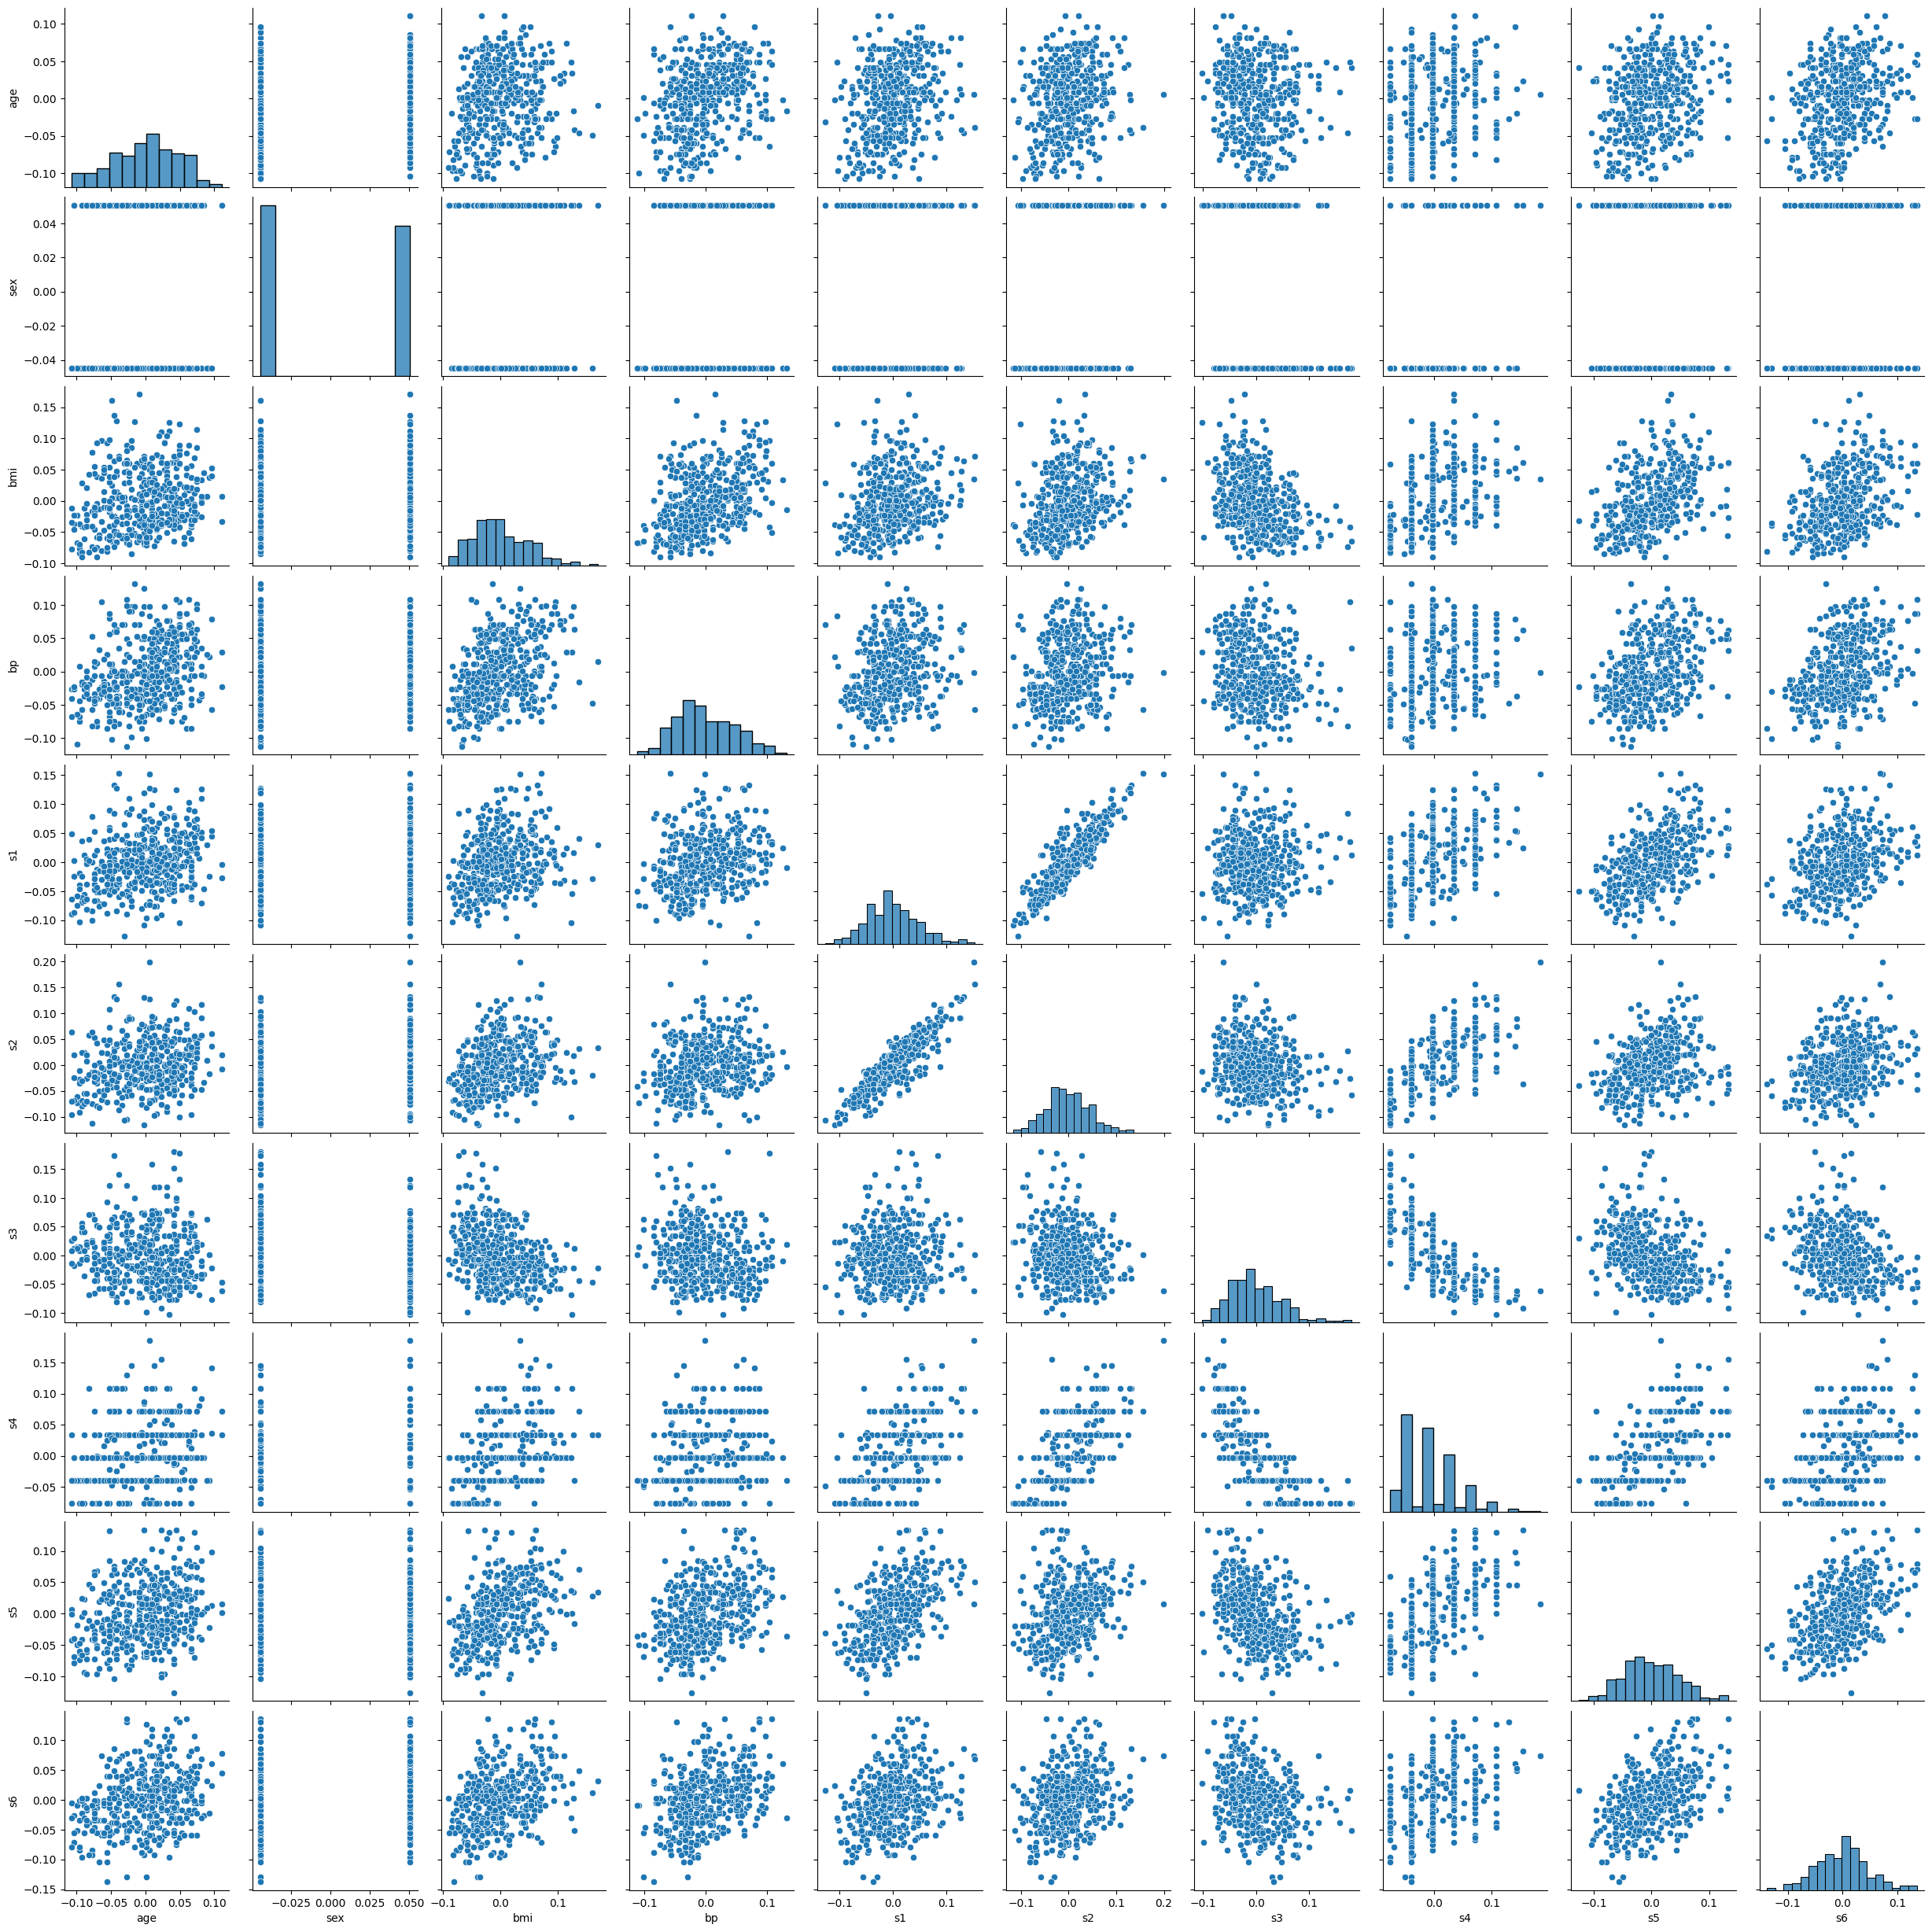

In [16]:
sns.pairplot(data=data.drop('Progression', axis=1))

A thanks to https://www.youtube.com/watch?v=wH_ezgftiy0 